# Latent Variable Models and Variational Bayes


### Preliminaries

- Goal 
  - Introduction to latent variable models and variational inference by Free energy minimization   
- Materials
  - Mandatory
    - These lecture notes
    - Ariel Caticha (2010), [Entropic Inference](https://arxiv.org/abs/1011.0723)
      - tutorial on entropic inference, which is a generalization to Bayes rule and provides a foundation for variational inference.
  - Optional 
    - Bishop (2016), pp. 461-486 (sections 10.1, 10.2 and 10.3) 
  - references <a id='references'></a>
    - Blei et al. (2017), [Variational Inference: A Review for Statisticians](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773) 
    - Lanczos (1961), [The variational principles of mechanics](https://www.amazon.com/Variational-Principles-Mechanics-Dover-Physics/dp/0486650677)
    - Senoz et al. (2021), [Variational Message Passing and Local Constraint Manipulation in Factor Graphs](https://www.mdpi.com/1099-4300/23/7/807)
    - Dauwels (2007), [On variational message passing on factor graphs](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Dauwels-2007-on-variational-message-passing-on-factor-graphs)
    - Caticha (2010), [Entropic Inference](https://arxiv.org/abs/1011.0723)
    - Shore and Johnson (1980), [Axiomatic Derivation of the Principle of Maximum Entropy and the Principle of Minimum Cross-Entropy](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/ShoreJohnson-1980-Axiomatic-Derivation-of-the-Principle-of-Maximum-Entropy.pdf)
    

### Illustrative Example <a id="illustrative-example"></a>: Density Modeling for the Old Faithful Data Set

- You're now asked to build a density model for a data set ([Old Faithful](https://en.wikipedia.org/wiki/Old_Faithful), Bishop pg. 681) that clearly is not distributed as a single Gaussian:

<p style="text-align:center;"><img src="./figures/fig-Bishop-A5-Old-Faithfull.png" width="500"></p>

###  Unobserved Classes

Consider again a set of observed data $D=\{x_1,\dotsc,x_N\}$

- This time we suspect that there are _unobserved_ class labels that would help explain (or predict) the data, e.g.,
  - the observed data are the color of living things; the unobserved classes are animals and plants.
  - observed are wheel sizes; unobserved categories are trucks and personal cars.
  - observed is an audio signal; unobserved classes include speech, music, traffic noise, etc.
 

   
- Classification problems with unobserved classes are called **Clustering** problems. The learning algorithm needs to **discover the classes from the observed data**.

### The Gaussian Mixture Model

- The spread of the data in the illustrative example looks like it could be modeled by two Gaussians. Let's develop a model for this data set. 

- Let $D=\{x_n\}$ be a set of observations. We associate a one-hot coded hidden class label $z_n$ with each observation:

$$\begin{equation*}
z_{nk} = \begin{cases} 1 & \text{if } x_n \in \mathcal{C}_k \text{ (the k-th class)}\\
                       0 & \text{otherwise} \end{cases}
\end{equation*}$$

- We consider the same model as we did in the [generative classification lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Generative-Classification.ipynb#GDA):
$$\begin{align*}
p(x_n | z_{nk}=1) &= \mathcal{N}\left( x_n | \mu_k, \Sigma_k\right)\\
p(z_{nk}=1) &= \pi_k
\end{align*}$$
which can be summarized with the selection variables $z_{nk}$ as
$$\begin{align*}
p(x_n,z_n) &= p(x_n | z_n) p(z_n) = \prod_{k=1}^K (\underbrace{\pi_k \cdot \mathcal{N}\left( x_n | \mu_k, \Sigma_k\right) }_{p(x_n,z_{nk}=1)})^{z_{nk}} 
\end{align*}$$

- *Again*, this is the same model  as we defined for the generative classification model: A Gaussian-Categorical model but now with unobserved classes). 

- This model (with **unobserved class labels**) is known as a **Gaussian Mixture Model** (GMM).

### The Marginal Distribution for the GMM

- In the literature, the GMM is often introduced by the marginal distribution for an _observed_ data point $x_n$, given by

$$\begin{align*}{}
p(x_n) &= \sum_{z_n} p(x_n,z_n)  \\
  &= \sum_{k=1}^K \pi_k \cdot \mathcal{N}\left( x_n | \mu_k, \Sigma_k \right) \tag{B-9.12}
\end{align*}$$

- Full proof as an [exercise](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-Latent-Variable-Models-and-VB.ipynb). 

- Note that Eq. B-9.12 is not the generative model. The generative model is the joint distribution $p(x,z)$ over all variables, including the latent variables. 

- Eq. B-9.12 reveals the link to the name Gaussian *mixture model*. The priors $\pi_k$ are also called **mixture coefficients**. 
  
 

###  GMM is a very flexible model

- GMMs are very popular models. They have decent computational properties and are **universal approximators of densities** (as long as there are enough Gaussians of course)

<p style="text-align:center;"><img src="./figures/fig-ZoubinG-GMM-universal-approximation.png" width="600"></p>

- (In the above figure, the Gaussian components are shown in <font color=red>red</font> and the pdf of the mixture models in <font color=blue>blue</font>).

### Latent Variable Models

- The GMM contains both _observed_ variables $\{x_n\}$, (unobserved) _parameters_ $\theta= \{\pi_k,\mu_k, \Sigma_k\}$ _and_ unobserved (synonym: latent, hidden) variables $\{z_{nk}\}$.

- From a Bayesian viewpoint, both latent variables $\{z_{nk}\}$ and parameters $\theta$ are just unobserved variables for which we can set a prior and compute a posterior by Bayes rule. 

- Note that $z_{nk}$ has a subscript $n$, hence its value depends not only on the cluster ($k$) but also on the $n$-th observation (in contrast to parameters). These observation-dependent latent variables are generally a useful tool to encode structure in the model. Here (in the GMM), the latent variables $\{z_{nk}\}$ encode (unobserved) class membership. 

- By adding model structure through (equations among) latent variables, we can build very complex models. Unfortunately, inference in latent variable models can also be much more complex than for fully observed models.

### Inference for GMM is Difficult


- We recall here the log-likelihood for the Gaussian-Categorial Model, see [generative classification lesson)](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Generative-Classification.ipynb)

$$
\log\, p(D|\theta) =  \sum_{n,k} y_{nk} \underbrace{ \log\mathcal{N}(x_n|\mu_k,\Sigma) }_{ \text{Gaussian} } + \underbrace{ \sum_{n,k} y_{nk} \log \pi_k }_{ \text{multinomial} } \,.
$$

- Since the class labels $y_{nk} \in \{0,1\}$ were given, this expression decomposed into a set of simple updates for the Gaussian and multinomial distributions. For both distributions, we have conjugate priors, so inference is easily solved. 

- However, for the Gaussian mixture model (same log-likelihood function with $z_{nk}$ replacing $y_{nk}$), the class labels $\{z_{nk}\}$ are _unobserved_ and need to estimated alongside with the parameters.

- There is no conjugate prior on the latent variables for the GMM likelihood function $p(\underbrace{D}_{\{x_n\}}\,|\,\underbrace{\{z_{nk}\},\{\mu_k,\Sigma_k,\pi_k\}}_{\text{all latent variables}})$.

- In this lesson, we introduce an approximate Bayesian inference method known as **Variational Bayes** (VB) (also known as **Variational Inference**) that can be used for Bayesian inference in models with latent variables. Later in this lesson, we will use VB to do inference in the GMM.   

- As a motivation for variational inference, we first discuss the foundation of inference by the **Method of Maximum Relative Entropy**, [(Caticha, 2010)](https://arxiv.org/abs/1011.0723). 

### Inference When Information is in the Form of Constraints 

- In the [probability theory lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Probability-Theory-Review.ipynb#Bayes-rule), we recognized Bayes rule as the fundamental rule for learning from data.

- We will now generalize this notion and consider learning as a process that updates a prior into a posterior distribution whenever new information becomes available.

- In this context, *new information* is not necessarily a new observation, but could (for instance) also relate to adding *constraints* on the posterior distribution.

- For example, consider a model $\prod_n p(x_n,z) = p(z) \prod_n p(x_n|z)$. 

- Our prior beliefs about $z$ are represented by $p(z)$. In the following, we will write $q(z)$ to denote a posterior distribution for $z$.

-  We might be interested in obtaining rational posterior beliefs $q(z)$ in consideration of the following additional constraints:
  1. *Data Constraints*: e.g., two observed data points $x_1=5$ and $x_2=3$, which lead to constraints $q(x_1) = \delta(x_1-5)$ and $q(x_2)=\delta(x_2-3)$.
  2. *Form Constraints*: e.g., we only consider the Gamma distribution for $q(z) = \mathrm{Gam}(z|\alpha,\beta)$.
  3. *Factorization Constraints*:, e.g., we consider independent marginals for the posterior distribution: $q(z) = \prod_k q(z_k)$. 
  3. *Moment Constraints*: e.g., the first moment of the posterior is given by $\int z q(z) \mathrm{d}z = 3$.


- Note that this is not "just" applying Bayes rule to compute a posterior, which can only deal with data constraints as specified by the likelihood function.

- Note also that observations _can_ be rephrased as constraints on the posterior, e.g., observation $x_1=5$ can be phrased as a constraint $q(x_1)=\delta(x_1-5)$.

- $\Rightarrow$ Updating a prior to a posterior on the basis of constraints on the posterior is more general than updating based on observations alone.

### The Method of Maximum Relative Entropy

- [Caticha (2010)](https://arxiv.org/abs/1011.0723) (based on earlier work by [Shore and Johnson (1980)](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/ShoreJohnson-1980-Axiomatic-Derivation-of-the-Principle-of-Maximum-Entropy.pdf)) developed the **method of maximum (relative) entropy** for rational updating of priors to posteriors when faced with new information in the form of constraints.

- Consider prior beliefs $p(z)$ about $z$. New information in the form of constraints is obtained and we are interested in the "best update" to a posterior $q(z)$.

- In order to define what "best update" means, we assume a ranking function $S[q,p]$ that generates a preference score for each candidate posterior $q$ for a given $p$. The best update from $p$ to $q$ is identified as $q^* = \arg\max_q S[q,p]$.   

- Similarly to [Cox' method to deriving probability theory](https://en.wikipedia.org/wiki/Cox%27s_theorem), Caticha introduced the following mild criteria based on a rational principle (the **principle of minimal updating**, see [Caticha 2010](https://arxiv.org/abs/1011.0723)) that the ranking function needs to adhere to: 
  1. *Locality*: local information has local effects.
  2. *Coordinate invariance*: the system of coordinates carries no information. 
  3. *Independence*: When systems are known to be independent, it should not matter whether they are treated separately or jointly. 
  

- These three criteria **uniquely identify the Relative Entropy** (RE) as the proper ranking function: 
$$\begin{align*}
S[q,p] = - \sum_z q(z) \log \frac{q(z)}{p(z)}
\end{align*}$$

- $\Rightarrow$ When information is supplied in the form of constaints on the posterior, we *should* select the posterior that maximizes the Relative Entropy, subject to the constraints. This is the **Method of Maximum (Relative) Entropy** (MRE). 

### Relative Entropy, KL Divergence and Free Energy

- Note that the Relative Entropy is technically a *functional*, i.e., a function of function(s) (since it is a function of probability distributions). The calculus of functionals is also called **variational calculus**.
  - See  [Lanczos, The variational principles of mechanics (1961)](https://www.amazon.com/Variational-Principles-Mechanics-Dover-Physics/dp/0486650677) for a great book on variational calculus. For a summary, see Bishop (2016), app.D.
  - It is customary to use square brackets (like $S[q,p]$) for functionals rather than round brackets, which we use for functions.  

- Also note the complimentary relation between the Maximum Relative Entropy method and Probability Theory: 
  - PT describes how to _represent_ beliefs about events and how to _calculate_ beliefs about joint and conditional events. 
  - In contrast, the MRE method describes how to _update_ beliefs when new information becomes available.
  

- PT and the MRE method are both needed to describe the theory of optimal information processing. (As we will see below, Bayes rule is a special case of the MRE method.)

- In principle, entropies can always be considered as a *relative* score against a reference distribution. For instance, the score $-\sum_{z_i} q(z_i) \log q(z_i)$ can be interpreted as a score against the uniform distribution, i.e., $-\sum_{z_i} q(z_i) \log q(z_i) \propto -\sum_{z_i} q(z_i) \log \frac{q(z_i)}{\mathrm{Uniform(z_i)}}$. Therefore, the "method of maximum relative entropy" is often simply known as the "method of maximum entropy". 

- The negative relative entropy is known as the **Kullback-Leibler** (KL) divergence:
$$
\mathrm{KL}[q,p] \triangleq \sum_z q(z) \log \frac{q(z)}{p(z)} \tag{B-1.113}
$$

- The [Gibbs inequality](https://en.wikipedia.org/wiki/Gibbs%27_inequality) ([proof](https://en.wikipedia.org/wiki/Gibbs%27_inequality#Proof)), is a famous theorem in information theory that states that 
$$\mathrm{KL}[q,p] \geq 0 $$
with equality only iff $p=q$.

  - The KL divergence can be interpreted as a "distance" between two probability distributions. Note however that the KL divergence is an asymmetric distance measure, i.e., in general $\mathrm{KL}[q,p] \neq \mathrm{KL}[p,q]$.

- We also introduce here the notion of a (variational) **Free Energy** (FE) functional, which is just a generalization of the KL-divergence that allows the prior to be unnormalized. Let $f(z) = Z \cdot p(z)$ be an unnormalized distribution, then the FE is defined as
$$\begin{align*}
F[q,p] &\triangleq \sum_z q(z) \log \frac{q(z)}{f(z)} \\
&= \sum_z q(z) \log \frac{q(z)}{Z\cdot p(z)} \\
&= \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z)}}_{\text{KL divergence }\geq 0} - \log Z
\end{align*}$$

- Since the second term ($\log Z$) is constant, FE minimization (subject to constraints) with respect to $q$ leads to the same posteriors as KL minimization and RE maximization.

- If we are only interested in minimizing FE with respect to $q$, then we'll write $F[q]$ (rather than $F[q,p]$) fo brevity. 

- In this class, we prefer to discuss inference in terms of minimizing Free Energy (subject to the constraints) rather than maximizing Relative Entropy, but note that these two concepts are equivalent. 

### Example KL divergence for Gaussians

The following animation illustrates the KL-divergence between two Gaussian distributions.


┌ Info: Saved animation to 
│   fn = /Users/wnuijten/Documents/biaslab/5SSD0 - BMLIP/BMLIP/lessons/notebooks/anim_lat_kl.gif
└ @ Plots /Users/wnuijten/.julia/packages/Plots/4UTBj/src/animation.jl:154


Plots.AnimatedGif("/Users/wnuijten/Documents/biaslab/5SSD0 - BMLIP/BMLIP/lessons/notebooks/anim_lat_kl.gif")
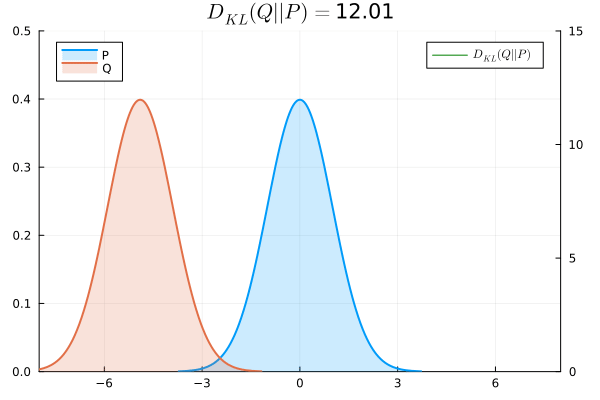

In [61]:
using Distributions, StatsPlots, Plots.PlotMeasures, LaTeXStrings

function kullback_leibler(q :: Normal, p :: Normal)                                 #Calculates the KL Divergence between two gaussians (see https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians for calculations)
    return log((p.σ / q.σ)) + ((q.σ)^2 + (p.μ - q.μ)^2) / (2*p.σ^2) - (1. / 2.)
end

μ_p = 0             #statistics of distributions we'll keep constant (we'll vary the mean of q). Feel free to change these and see what happens
σ_p = 1
σ_q = 1

p = Normal(μ_p, σ_p)

anim = @animate for i in 1:100
    μ_seq = [(j / 10.) - 5. + μ_p for j in 1:i]                                                                                                         #compute the sequence of means tested so far (to compute sequence of KL divergences)
    kl = [kullback_leibler(Normal(μ, σ_q), p) for μ in μ_seq]                                                                                           #compute KL divergence data
    viz = plot(right_margin=8mm, title=string(L"D_{KL}(Q || P) = ", round(100 * kl[i]) / 100.), legend=:topleft)                                        #build plot and format title and margins
    μ_q = μ_seq[i]                                                                                                                                      #extract mean of current frame from mean sequence
    q = Normal(μ_q, σ_q)
    plot!(p, xlims = (μ_p - 8, μ_p + 8), fill=(0, .2,), label=string("P"), linewidth=2, ylims=(0,0.5))                                                  #plot p
    plot!(q, fill=(0, .2,), label=string("Q"), linewidth=2, ylims=(0,0.5))                                                                              #plot q
    plot!(twinx(), μ_seq, kl, xticks=:none, ylims=(0, maximum(kl) + 3), linewidth = 3,                                                                  #plot KL divergence data with different y-axis scale and different legend
        legend=:topright,xlims = (μ_p - 8, μ_p + 8), color="green", label=L"D_{KL}(Q || P)")
end

gif(anim, "anim_lat_kl.gif")

### The Free Energy Functional and Variational Bayes

- Let's get back to the issue of doing inference for models with latent variables (such as the GMM). 

- Consider a generative model specified by $p(x,z)$ where $x$ and $z$ represent the observed and unobserved variables, respectively.

- Assume further that $x$ has been observed as $x=\hat{x}$ and we are interested in performing inference, i.e., we want to compute the posterior $p(z|x=\hat{x})$ for the latent variables and we want to compute the evidence $p(x=\hat{x})$.

- According to the Method of Maximum Relative Entropy, in order to find the correct posterior $q(x,z)$, we should minimize

$$
\mathrm{F}[q] = \sum_{x,z} q(x,z) \log \frac{q(x,z)}{p(x,z)}\,, \quad \text{subject to data constraint }x=\hat{x}
$$

- The data constraint $x=\hat{x}$ fixes posterior $q(x) = \delta(x-\hat{x})$, so the Free Energy evaluates to  

$$\begin{align*}
F[q] &= \sum_{z} \sum_{x}q(z|x)q(x) \log \frac{q(z|x) q(x)}{p(z|x) p(x)} \\
  &= \sum_{z} \sum_{x} q(z|x)\delta(x-\hat{x}) \log \frac{q(z|x)\delta(x-\hat{x})}{p(z|x) p(x)} \\
  &= \sum_{z} q(z|\hat{x}) \log \frac{q(z|\hat{x})}{p(z|\hat{x}) p(\hat{x}) } \\
  &=  \underbrace{\sum_{z}q(z|\hat{x}) \log \frac{q(z|\hat{x})}{p(z|\hat{x})}}_{\text{KL divergence }\geq 0} - \underbrace{\log p(\hat{x})}_{\text{log-evidence}}  \tag{B-10.2}
\end{align*}$$

- The log-evidence term does not depend on $q$. Hence, the global minimum $q(z|\hat{x})^* \triangleq \arg\min_q F[q]$ is obtained for $$q^*(z|\hat{x}) = p(z|\hat{x})\,,$$ which is the correct **Bayesian posterior**.

- Furthermore, the minimal free energy $$F^* \triangleq F[q^*] = -\log p(\hat{x})$$ equals minus **log-evidence**. (Or, equivalently, the evidence is given by $p(\hat{x}) = \exp\left(-F[q^*] \right)$.)  

-  This is an amazing result!  Note that FE minimization transforms an inference problem (that involves integration) to an optimization problem! Generally, optimization problems are easier to solve than integration problems. 

- Executing inference by minimizing the variational FE functional is called **Variational Bayes** (VB) or variational inference. 

-  (As an aside), note that Bishop introduces in Eq. B-10.2 an _Evidence Lower BOund_ (in modern machine learning literature abbreviated as **ELBO**) $\mathcal{L}(z)$ that equals the _negative_ FE. We prefer to discuss variational inference in terms of a free energy (but it is the same story as he discusses with the ELBO).  

###  FE Minimization as Approximate Bayesian Inference

- In the rest of this lesson, we are concerned with how to execute FE minimization (FEM) w.r.t $q$ for the functional
$$
 F[q] = \sum_{z}q(z) \log \frac{q(z)}{p(z|x)} - \log p(x)  
 $$
where $x$ has been observed and $z$ represent all latent variables.
  - To keep the notation uncluttered, in the following we write $x$ rather than $\hat{x}$, and we write simply $q(z)$ (rather than $q(z|\hat{x})$) for the posterior.  

- Due to restrictions in our optimization algorithm, we are often unable to fully minimize the FE to the global minimum $q^*(z)$, but rather get stuck in a local minimum $\hat{q}(z)$. 

- Note that, since $\mathrm{KL}[q(z),p(z|x)]\geq 0$ for any $q(z)$, the FE is always an upperbound on (minus) log-evidence, i.e.,
$$
F[q] \geq -\log p(x) \,.
$$

- In practice, even if we cannot attain the global minimum, we can still use the local minimum $\hat{q}(z) \approx \arg\min_q F[q]$ to accomplish **approximate Bayesian inference**:   

$$\begin{align*}
   \text{posterior: } \hat{q}(z) &\approx p(z|x) \\
   \text{evidence: } p(x) &\approx \exp\left( -F[\hat{q}]\right) 
    \end{align*}$$

### Constrained FE Minimization

- Generally speaking, it can be very helpful in the FE minimization task to add some additional constraints on $q(z)$ (i.e., in addition to the data constraints).

- Once we add constraints to $q$ (in addition to data constraints), we are no longer guaranteed that the minimum of the (constrained) FE coincides with the solution by Bayes rule (which only takes data as constraints). So again, at best constrained FEM is only an **approximation to Bayes rule**.

- There are three important cases of adding constraints to $q(z)$ that often alleviates the FE minimization task:

#### 1. mean-field factorization
- We constrain the posterior to factorize into a set of _independent_ factors, i.e., 
$$
q(z) = \prod_{j=1}^m q_j(z_j)\,, \tag{B-10.5}
$$ 
  - Variational inference with mean-field factorization has been worked out in detail as the **Coordinate Ascent Variational Inference** (CAVI) algorithm. See the [Optional Slide on CAVI](#CAVI) for details. 

####  2. fixed-form parameterization
- We constrain the posterior to be part of a parameterized probability distribution, e.g., $$q(z) = \mathcal{N}\left( z | \mu, \Sigma \right)\,.$$ 
  - In this case, the functional minimization problem for $F[q]$ reduces to the minimization of a _function_ $F(\mu,\Sigma)$ w.r.t. its parameters. We can often use standand gradient-based optimization methods to minimize the FE.   
  - The following image by [David Blei](https://www.cs.columbia.edu/~blei/) illustrates this approach
  <p style="text-align:center;"><img src="./figures/blei-variational-inference.png" width="600"></p>
 

#### 3. the Expectation-Maximization (EM) algorithm
- We place some constraints both on the prior and posterior for $z$ ([also to be discussed in an Optional Slide](#EM-Algorithm)) that simplifies FE minimization to maximum-likelihood estimation. 

### Example: FEM for the Gaussian Mixture Model (CAVI Approach)

- Let's get back to the illustrative example at the beginning of this lesson: we want to do [density modeling for the Old Faithful data set](#illustrative-example).

#### model specification


- We consider a Gaussian Mixture Model, specified by 
$$\begin{align*}
p(x,z|\theta) &= p(x|z,\mu,\Lambda)p(z|\pi) \\
  &= \prod_{n=1}^N \prod_{k=1}^K \left(\pi_k \cdot \mathcal{N}\left( x_n | \mu_k, \Lambda_k^{-1}\right)\right)^{z_{nk}} \tag{B-10.37,38}
\end{align*}$$
with tuning parameters $\theta=\{\pi_k, \mu_k,\Lambda_k\}$.

- Let us introduce some priors for the parameters. We factorize the prior and choose conjugate distributions by
$$
p(\theta) = p(\pi,\mu,\Lambda) = p(\pi) p(\mu|\Lambda) p(\Lambda)
$$
with 
$$\begin{align*}
p(\pi) &= \mathrm{Dir}(\pi|\alpha_0) = C(\alpha_0) \prod_k \pi_k^{\alpha_0-1} \qquad &&\text{(B-10.39)}\\
p(\mu|\Lambda) &= \prod_k \mathcal{N}\left(\mu_k | m_0, \left( \beta_0 \Lambda_k\right)^{-1} \right) \qquad &&\text{(B-10.40)}\\
p(\Lambda) &= \prod_k \mathcal{W}\left( \Lambda_k | W_0, \nu_0 \right) \qquad &&\text{(B-10.40)}
\end{align*}$$
where $\mathcal{W}\left( \cdot \right)$ is a [Wishart distribution](https://en.wikipedia.org/wiki/Wishart_distribution) (i.e., a multi-dimensional Gamma distribution).

- The full generative model is now specified by
$$
p(x,z,\pi,\mu,\Lambda) = p(x|z,\mu,\Lambda) p(z|\pi) p(\pi) p(\mu|\Lambda) p(\Lambda) \tag{B-10.41}
$$
with hyperparameters $\{ \alpha_0, m_0, \beta_0, W_0, \nu_0\}$.

#### inference

- Assume that we have observed $D = \left\{x_1, x_2, \ldots, x_N\right\}$ and are interested to infer the posterior distribution for the tuning parameters: 
$$
p(\theta|D) = p(\pi,\mu,\Lambda|D)
$$

- The (perfect) Bayesian solution is 
$$
p(\theta|D) = \frac{p(x=D,\theta)}{p(x=D)} = \frac{\sum_z p(x=D,z,\pi,\mu,\Lambda)}{\sum_z \sum_{\pi} \iint p(x=D,z,\pi,\mu,\Lambda) \,\mathrm{d}\mu\mathrm{d}\Lambda}
$$
but this is intractable (See [Blei (2017), p861, eqs. 8 and 9](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773)).

- <a id="mf-constraint"></a>Alternatively, we can use **FE minimization with factorization constraint** 
$$\begin{equation}
q(\theta) = q(z) \cdot q(\pi,\mu,\Lambda) \tag{B-10.42}
\end{equation}$$ 
on the posterior. For the specified model, this extra constaint leads to FE minimization wrt the hyperparameters, i.e., we need to minimize the function $F(\alpha_0, m_0, \beta_0, W_0, \nu_0)$.

- Bishop shows that the equations for the [optimal solutions (Eq. B-10.9)](#optimal-solutions) are analytically solvable for the GMM as specified above, leading to the following variational update equations (for $k=1,\ldots,K$): 
$$
\begin{align*}
\alpha_k &= \alpha_0 + N_k  \tag{B-10.58} \\
\beta_k &= \beta_0 + N_k  \tag{B-10.60} \\
m_k &= \frac{1}{\beta_k} \left( \beta_0 m_0 + N_k \bar{x}_k \right) \tag{B-10.61} \\
W_k^{-1} &= W_0^{-1} + N_k S_k + \frac{\beta_0 N_k}{\beta_0 + N_k}\left( \bar{x}_k - m_0\right) \left( \bar{x}_k - m_0\right)^T \tag{B-10.62} \\
\nu_k &= \nu_0 + N_k \tag{B-10.63}
\end{align*}
$$
where we used
$$
\begin{align*}
\log \rho_{nk} &= \mathbb{E}\left[ \log \pi_k\right] + \frac{1}{2}\mathbb{E}\left[ \log | \Lambda_k | \right] - \frac{D}{2} \log(2\pi) \\ 
 & \qquad - \frac{1}{2}\mathbb{E}\left[(x_k - \mu_k)^T \Lambda_k(x_k - \mu_k)  \right]  \tag{B-10.46} \\
r_{nk} &= \frac{\rho_{nk}}{\sum_{j=1}^K \rho_{nj}} \tag{B-10.49} \\
N_k &= \sum_{n=1}^N r_{nk} x_n \tag{B-10.51} \\
\bar{x}_k &= \frac{1}{N_k} \sum_{n=1}^N r_{nk} x_n \tag{B-10.52} \\
S_k &= \frac{1}{N_k} \sum_{n=1}^N r_{nk} \left( x_n - \bar{x}_k\right) \left( x_n - \bar{x}_k\right)^T \tag{B-10.53}
\end{align*}
$$

- Exam guide: Working out FE minimization for the GMM to these update equations (eqs B-10.58 through B-10.63) is not something that you need to reproduce without assistance at the exam. Rather, the essence is that *it is possible* to arrive at closed-form variational update equations for the GMM. You should understand though how FEM works conceptually and in principle be able to derive variational update equations for very simple models that do not involve clever mathematical tricks.

### Code Example: FEM for GMM on Old Faithfull data set

- Below we exemplify training of a Gaussian Mixture Model on the Old Faithful data set by Free Energy Minimization, using the constraints as specified above, e.g., [(B-10.42)](#mf-constraint). 

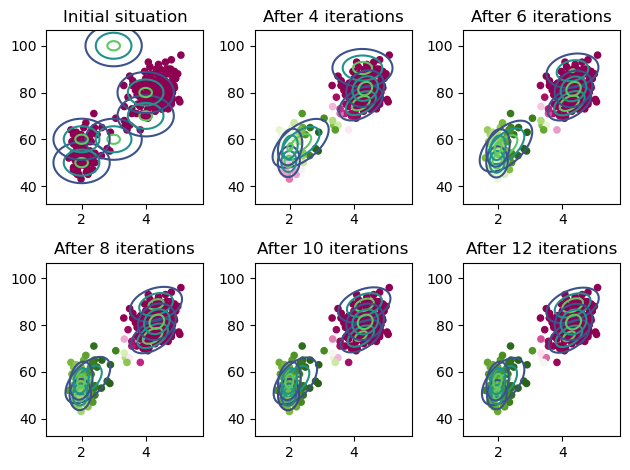

In [1]:
using DataFrames, CSV, LinearAlgebra, PDMats, SpecialFunctions
include("scripts/gmm_plot.jl") # Holds plotting function 
old_faithful = CSV.read("datasets/old_faithful.csv",DataFrame);
X = convert(Matrix{Float64}, [old_faithful[!,1] old_faithful[!,2]]');#data matrix
N = size(X, 2) #number of observations
K = 6

function sufficientStatistics(X,r,k::Int) #function to compute sufficient statistics
    N_k = sum(r[k,:])
    hat_x_k = sum([r[k,n]*X[:,n] for n in 1:N]) ./ N_k
    S_k = sum([r[k,n]*(X[:,n]-hat_x_k)*(X[:,n]-hat_x_k)' for n in 1:N]) ./ N_k
    return N_k, hat_x_k, S_k
end

function updateMeanPrecisionPi(m_0,β_0,W_0,ν_0,α_0,r) #variational maximisation function
    m = Array{Float64}(undef,2,K) #mean of the clusters 
    β = Array{Float64}(undef,K) #precision scaling for Gausian distribution
    W = Array{Float64}(undef,2,2,K) #precision prior for Wishart distributions
    ν = Array{Float64}(undef,K) #degrees of freedom parameter for Wishart distribution
    α = Array{Float64}(undef,K) #Dirichlet distribution parameter 
    for k=1:K
        sst = sufficientStatistics(X,r,k)
        α[k] = α_0[k] + sst[1]; β[k] = β_0[k] + sst[1]; ν[k] = ν_0[k] .+ sst[1]
        m[:,k] = (1/β[k])*(β_0[k].*m_0[:,k] + sst[1].*sst[2])
        W[:,:,k] = inv(inv(W_0[:,:,k])+sst[3]*sst[1] + ((β_0[k]*sst[1])/(β_0[k]+sst[1])).*(sst[2]-m_0[:,k])*(sst[2]-m_0[:,k])')
    end
    return m,β,W,ν,α
end

function updateR(Λ,m,α,ν,β) #variational expectation function
    r = Array{Float64}(undef,K,N) #responsibilities 
    hat_π = Array{Float64}(undef,K) 
    hat_Λ = Array{Float64}(undef,K)
    for k=1:K
        hat_Λ[k] = 1/2*(2*log(2)+logdet(Λ[:,:,k])+digamma(ν[k]/2)+digamma((ν[k]-1)/2))
        hat_π[k] = exp(digamma(α[k])-digamma(sum(α)))
        for n=1:N
           r[k,n] = hat_π[k]*exp(-hat_Λ[k]-1/β[k] - (ν[k]/2)*(X[:,n]-m[:,k])'*Λ[:,:,k]*(X[:,n]-m[:,k]))
        end
    end
    for n=1:N
        r[:,n] = r[:,n]./ sum(r[:,n]) #normalize to ensure r represents probabilities 
    end
    return r
end

max_iter = 15
#store the inference results in these vectors
ν = fill!(Array{Float64}(undef,K,max_iter),3)
β = fill!(Array{Float64}(undef,K,max_iter),1.0)
α = fill!(Array{Float64}(undef,K,max_iter),0.01)
R = Array{Float64}(undef,K,N,max_iter)
M = Array{Float64}(undef,2,K,max_iter)
Λ = Array{Float64}(undef,2,2,K,max_iter)
clusters_vb = Array{Distribution}(undef,K,max_iter) #clusters to be plotted
#initialize prior distribution parameters
M[:,:,1] = [[3.0; 60.0];[4.0; 70.0];[2.0; 50.0];[2.0; 60.0];[3.0; 100.0];[4.0; 80.0]]
for k=1:K
    Λ[:,:,k,1] = [1.0 0;0 0.01]
    R[k,:,1] = 1/(K)*ones(N)
    clusters_vb[k,1] = MvNormal(M[:,k,1],PDMats.PDMat(convert(Matrix,Hermitian(inv(ν[1,1].*Λ[:,:,k,1])))))
end
#variational inference
for i=1:max_iter-1
    #variational expectation 
    R[:,:,i+1] = updateR(Λ[:,:,:,i],M[:,:,i],α[:,i],ν[:,i],β[:,i]) 
    #variational minimisation
    M[:,:,i+1],β[:,i+1],Λ[:,:,:,i+1],ν[:,i+1],α[:,i+1] = updateMeanPrecisionPi(M[:,:,i],β[:,i],Λ[:,:,:,i],ν[:,i],α[:,i],R[:,:,i+1])
    for k=1:K
        clusters_vb[k,i+1] = MvNormal(M[:,k,i+1],PDMats.PDMat(convert(Matrix,Hermitian(inv(ν[k,i+1].*Λ[:,:,k,i+1])))))
    end
end


subplot(2,3,1); plotGMM(X, clusters_vb[:,1], R[:,:,1]); title("Initial situation")
for i=2:6
    subplot(2,3,i)
    plotGMM(X, clusters_vb[:,i*2], R[:,:,i*2]); title("After $(i*2) iterations")
end
PyPlot.tight_layout();

The generated figure looks much like Figure 10.6 in Bishop. The plots show results for Variational Bayesian
mixture of K = 6 Gaussians applied to the Old Faithful data set, in
which the ellipses denote the one
standard-deviation density contours
for each of the components, and the
color coding of the data points reflects the "soft" class label assignments. Components whose expected
mixing coefficient are numerically indistinguishable from zero are not
plotted. Note that this procedure learns the number of classes (two), learns the class label for each observation, and learns the mean and variance for the Gaussian data distributions.

###  Interesting Decompositions of the Free Energy Functional

- <a id='fe-decompositions'></a> The FE functional can be decomposed in various interesting ways, making use of $p(x,z) = p(z|x)p(x) = p(x|z)p(z)$ 

$$\begin{align*}
\mathrm{F}[q] &= \underbrace{-\sum_z q(z) \log p(x,z)}_{\text{energy}} - \underbrace{\sum_z q(z) \log \frac{1}{q(z)}}_{\text{entropy}} \qquad &&\text{(EE)} \\
&= \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z|x)}}_{\text{KL divergence}\geq 0} - \underbrace{\log p(x)}_{\text{log-evidence}} \qquad &&\text{(DE)} \\
&= \underbrace{\sum_z q(z)\log\frac{q(z)}{p(z)}}_{\text{complexity}} - \underbrace{\sum_z q(z) \log p(x|z)}_{\text{accuracy}}  \qquad &&\text{(CA)}
\end{align*}$$

- These <a id="#fe-decompositions">decompositions</a> are very insightful (we will revisit them later) and we will label them respectively as _energy-entropy_ (EE), _divergence-evidence_ (DE), and _complexity-accuracy_ (CA) decompositions. 

- In the [Bayesian Machine Learning](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Bayesian-Machine-Learning.ipynb) lecture, we discussed the CA decomposition of Bayesian model evidence to support the interpretation of evidence as a model performance criterion. Here, we recognize that FE allows a similar CA decomposition: minimizing FE increases data fit and decreases model complexity. Hence, FE is a good model performance criterion.

- The CA decomposition makes use of the prior $p(z)$ and likelihood $p(x|z)$, both of which are selected by the engineer, so the FE can be evaluated with this decomposition!

- The DE decomposition restates what we derived earlier, namely that the FE is an upperbound on the (negative) log-evidence. The bound is the KL-divergence between the variational posterior $q(z)$ and the (perfect) Bayesian posterior $p(z|x)$. Global minimization of FE with only data constraints drives the KL-divergence to zero and results to perfect Bayesian inference.  

- The EE decomposition provides a link to the [second law of thermodynamics](https://en.wikipedia.org/wiki/Second_law_of_thermodynamics): Minimizing FE leads to entropy maximization, subject to constraints, where in this case the constraints are imposed by the postulated generative model. 




###  Summary

- Latent variable models (LVM) contain a set of unobserved variables whose size grows with the number of observations.

- LVMs can model more complex phenomena than fully observed models, but inference in LVM models is usually not analytically solvable.

- The Free Energy (FE) functional transforms Bayesian inference computations (very large summations or integrals) to an optimization problem. 

- Inference by minimizing FE, also known as variational inference, is fully consistent with the "Method of Maximum Relative Entropy", which is by design the rational way to update beliefs from priors to posteriors when new information becomes available. Thus, FE mimimization is the "correct" inference procedure that generalizes Bayes rule. 

- In general, global FE minimization is an unsolved problem and finding good local minima is at the heart of current Bayesian technology research. Three simplifying constraints on the posterior $q(z)$ in the FE functional are currently popular in practical settings:
    - mean-field assumptions
    - assuming a parametric from for $q$
    - EM algorithm
 

   
- These constraints often makes FE minimization implementable at the price of obtaining approximately Bayesian inference results. 

- The back-ends of Probabilistic Programming Languages (such as [ReactiveMP.jl](https://github.com/biaslab/ReactiveMP.jl)) often contain lots of methods for automating constrained FE minimization. 


## <center><a id="optional-slides">OPTIONAL SLIDES</a></center>

### FE Minimization with Mean-field Factorization Constraints: <a id="CAVI">the CAVI Approach</a> 

- Let's work out FE minimization with additional mean-field constraints (=full factorization) constraints:  $$q(z) = \prod_{j=1}^m q_j(z_j)\,.$$

  - In other words, the posteriors for $z_j$ are all considered independent. This is a strong constraint but leads often to good solutions.
  
- Given the mean-field constraints, it is possible to derive the following expression for the <a id="optimal-solutions">optimal solutions</a> $q_j^*(z_j)$, for $j=1,\ldots,m$: 

\begin{equation*} \tag{B-10.9}
\boxed{
\begin{aligned}
\log q_j^*(z_j) &\propto \mathrm{E}_{q_{-j}^*}\left[ \log p(x,z) \right]  \\
  &= \underbrace{\sum_{z_{-j}} q_{-j}^*(z_{-j}) \underbrace{\log p(x,z)}_{\text{"field"}}}_{\text{"mean field"}} 
\end{aligned}}
\end{equation*}

where we defined $q_{-j}^*(z_{-j}) \triangleq q_1^*(z_1)q_2^*(z_2)\cdots q_{j-1}^*(z_{j-1})q_{j+1}^*(z_{j+1})\cdots q_m^*(z_m)$.
- **Proof** (from [Blei, 2017](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773)): We first rewrite the FE as a function of $q_j(z_j)$ only: 
  $$ F[q_j] = \mathbb{E}_{q_{j}}\left[ \mathbb{E}_{q_{-j}}\left[ \log p(x,z_j,z_{-j})\right]\right] - \mathbb{E}_{q_j}\left[ \log q_j(z_j)\right] + \mathtt{const.}\,,$$
  where the constant holds all terms that do not depend on $z_j$. This expression can be written as 
  $$ F[q_j] = \sum_{z_j} q_j(z_j) \log \frac{q_j(z_j)}{\exp\left( \mathbb{E}_{q_{-j}}\left[ \log p(x,z_j,z_{-j})\right]\right)}$$
  which is a KL-divergence that is minimized by Eq. B-10.9.  (end proof)
  
- This is not yet a full solution to the FE minimization task since the solution $q_j^*(z_j)$ depends on expectations that involve other solutions $q_{i\neq j}^*(z_{i \neq j})$, and each of these other solutions $q_{i\neq j}^*(z_{i \neq j})$ depends on an expection that involves $q_j^*(z_j)$. 
- In practice, we solve this chicken-and-egg problem by an iterative approach: we first initialize all $q_j(z_j)$ (for $j=1,\ldots,m$) to an appropriate initial distribution and then cycle through the factors in turn by solving eq.B-10.9 and update $q_{-j}^*(z_{-j})$ with the latest estimates. (See [Blei, 2017](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1285773), Algorithm 1, p864).  

- This algorithm for approximating Bayesian inference is known **Coordinate Ascent Variational Inference** (CAVI).   

### <a id="EM-Algorithm">FE Minimization by the Expectation-Maximization (EM) Algorithm</a>

- The EM algorithm is a special case of FE minimization that focusses on Maximum-Likelihood estimation for models with latent variables. 
- Consider a model $$p(x,z,\theta)$$ with observations $x = \{x_n\}$, latent variables $z=\{z_n\}$ and parameters $\theta$.

- We can write the following FE functional for this model:
$$\begin{align*}
F[q] =  \sum_z \sum_\theta q(z,\theta) \log \frac{q(z,\theta)}{p(x,z,\theta)} 
\end{align*}$$

- The EM algorithm makes the following simplifying assumptions:
  1. The prior for the parameters is uninformative (uniform). This implies that 
  $$p(x,z,\theta) = p(x,z|\theta) p(\theta) \propto p(x,z|\theta)$$
  2. A factorization constraint $$q(z,\theta) = q(z) q(\theta)$$
  3. The posterior for the parameters is a delta function:
  $$q(\theta) = \delta(\theta - \hat{\theta})$$
 

 
- Basically, these three assumptions turn FE minimization into maximum likelihood estimation for the parameters $\theta$ and the FE simplifies to 
$$\begin{align*}
F[q,\theta] =  \sum_z q(z) \log \frac{q(z)}{p(x,z|\theta)} 
\end{align*}$$

- The EM algorithm minimizes this FE by iterating (iteration counter: $i$) over 

\begin{equation*}
\boxed{
\begin{aligned}
\mathcal{L}^{(i)}(\theta) &= \sum_z \overbrace{p(z|x,\theta^{(i-1)})}^{q^{(i)}(z)}  \log p(x,z|\theta) \quad &&\text{the E-step} \\
\theta^{(i)} &= \arg\max_\theta \mathcal{L}^{(i)}(\theta) &&\text{the M-step}
\end{aligned}}
\end{equation*}

- These choices are optimal for the given FE functional. In order to see this, consider the two decompositions
$$\begin{align*}
F[q,\theta] &= \underbrace{-\sum_z q(z) \log p(x,z|\theta)}_{\text{energy}} - \underbrace{\sum_z q(z) \log \frac{1}{q(z)}}_{\text{entropy}} \qquad &&\text{(EE)}\\
  &= \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z|x,\theta)}}_{\text{divergence}} - \underbrace{\log p(x|\theta)}_{\text{log-likelihood}}  \qquad &&\text{(DE)}
\end{align*}$$

- The DE decomposition shows that the FE is minimized for the choice $q(z) := p(z|x,\theta)$. Also, for this choice, the FE equals the (negative) log-evidence (, which is this case simplifies to the log-likelihood). 

- The EE decomposition shows that the FE is minimized wrt $\theta$ by minimizing the energy term. The energy term is computed in the E-step and optimized in the M-step.
  - Note that in the EM literature, the energy term is often called the _expected complete-data log-likelihood_.)

- In order to execute the EM algorithm, it is assumed that we can analytically execute the E- and M-steps. For a large set of models (including models whose distributions belong to the exponential family of distributions), this is indeed the case and hence the large popularity of the EM algorithm. 

- The EM algorihm imposes rather severe assumptions on the FE (basically approximating Bayesian inference by maximum likelihood estimation). Over the past few years, the rise of Probabilistic Programming languages has dramatically increased the range of models for which the parameters can by estimated autmatically by (approximate) Bayesian inference, so the popularity of EM is slowly waning. (More on this in the Probabilistic Programming lessons). 

- Bishop (2006) works out EM for the GMM in section 9.2.

### Code Example: EM-algorithm for the GMM on the Old-Faithful data set

We'll perform clustering on the data set from the [illustrative example](#illustrative-example) by fitting a GMM consisting of two Gaussians using the EM algorithm. 

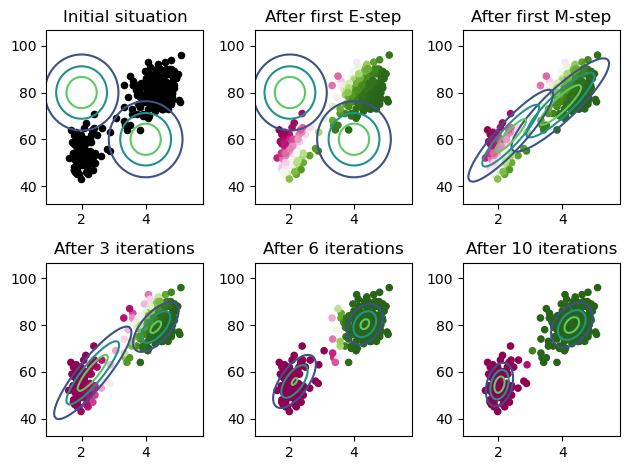

In [2]:
using DataFrames, CSV, LinearAlgebra
include("scripts/gmm_plot.jl") # Holds plotting function 
old_faithful = CSV.read("datasets/old_faithful.csv", DataFrame);

X =  Array(Matrix{Float64}(old_faithful)')
N = size(X, 2)

# Initialize the GMM. We assume 2 clusters.
clusters = [MvNormal([4.;60.], [.5 0;0 10^2]); 
            MvNormal([2.;80.], [.5 0;0 10^2])];
π_hat = [0.5; 0.5]                    # Mixing weights
γ = fill!(Matrix{Float64}(undef,2,N), NaN)  # Responsibilities (row per cluster)

# Define functions for updating the parameters and responsibilities
function updateResponsibilities!(X, clusters, π_hat, γ)
    # Expectation step: update γ
    norm = [pdf(clusters[1], X) pdf(clusters[2], X)] * π_hat
    γ[1,:] = (π_hat[1] * pdf(clusters[1],X) ./ norm)'
    γ[2,:] = 1 .- γ[1,:]
end
function updateParameters!(X, clusters, π_hat, γ)
    # Maximization step: update π_hat and clusters using ML estimation
    m = sum(γ, dims=2)
    π_hat = m / N
    μ_hat = (X * γ') ./ m'
    for k=1:2
        Z = (X .- μ_hat[:,k])
        Σ_k = Symmetric(((Z .* (γ[k,:])') * Z') / m[k])
        clusters[k] = MvNormal(μ_hat[:,k], convert(Matrix, Σ_k))
    end
end

# Execute the algorithm: iteratively update parameters and responsibilities
subplot(2,3,1); plotGMM(X, clusters, γ); title("Initial situation")
updateResponsibilities!(X, clusters, π_hat, γ)
subplot(2,3,2); plotGMM(X, clusters, γ); title("After first E-step")
updateParameters!(X, clusters, π_hat, γ)
subplot(2,3,3); plotGMM(X, clusters, γ); title("After first M-step")
iter_counter = 1
for i=1:3
    for j=1:i+1
        updateResponsibilities!(X, clusters, π_hat, γ)
        updateParameters!(X, clusters, π_hat, γ)
        iter_counter += 1
    end
    subplot(2,3,3+i); 
    plotGMM(X, clusters, γ); 
    title("After $(iter_counter) iterations")
end
PyPlot.tight_layout()

Note that you can step through the interactive demo yourself by running [this script](https://github.com/bertdv/AIP-5SSB0/blob/master/lessons/notebooks/scripts/interactive_em_demo.jl) in julia. You can run a script in julia by    
`julia> include("path/to/script-name.jl")`

### Message Passing for Free Energy Minimization

- The Sum-Product (SP) update rule implements perfect Bayesian inference. 
- Sometimes, the SP update rule is not analytically solvable. 
- Fortunately, for many well-known Bayesian approximation methods, a message passing update rule can be created, e.g. [Variational Message Passing](https://en.wikipedia.org/wiki/Variational_message_passing) (VMP) for variational inference. 
- In general, all of these message passing algorithms can be interpreted as minimization of a constrained free energy (e.g., see [Senoz et al. (2021)](https://www.mdpi.com/1099-4300/23/7/807), and hence these message passing schemes comply with [Caticha's Method of Maximum Relative Entropy](https://arxiv.org/abs/1011.0723), which, as discussed in the [variational Bayes lesson](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Latent-Variable-Models-and-VB.ipynb) is the proper way for updating beliefs. 
- Different message passing updates rules can be combined to get a hybrid inference method in one model. 

### The Local Free Energy in a Factor Graph 

- Consider an edge $x_j$ in a Forney-style factor graph for a generative model $p(x) = p(x_1,x_2,\ldots,x_N)$.



- Assume that the graph structure (factorization) is specified by
$$
p(x) = \prod_{a=1}^M p_a(x_a)
$$
where $a$ is a set of indices.
- Also, we assume a mean-field approximation for the posterior:
$$
q(x) = \prod_{i=1}^N q_i(x_i)
$$
and consequently a corresponding free energy functional  
$$\begin{align*}
F[q] &= \sum_x q(x) \log \frac{q(x)}{p(x)} \\
  &= \sum_i \sum_{x_i} \left(\prod_{i=1}^N q_i(x_i)\right) \log \frac{\prod_{i=1}^N q_i(x_i)}{\prod_{a=1}^M p_a(x_a)}
\end{align*}$$

- With these assumptions, it can be shown that the FE evaluates to (exercise)
$$
F[q] = \sum_{a=1}^M \underbrace{\sum_{x_a} \left( \prod_{j\in N(a)} q_j(x_j)\cdot \left(-\log p_a(x_a)\right) \right) }_{\text{node energy }U[p_a]} - \sum_{i=1}^N \underbrace{\sum_{x_i} q_i(x_i) \log \frac{1}{q_i(x_i)}}_{\text{edge entropy }H[q_i]}
$$

- In words, the FE decomposes into a sum of (expected) energies for the nodes minus the entropies on the edges. 
 

### Variational Message Passing

- Let us now consider the local free energy that is associated with edge corresponding to $x_j$. 
  
  <p style="text-align:center;"><img src="./figures/VMP-two-nodes.png" width="600"></p>
  
  
- Apparently (see previous slide), there are three contributions to the free energy for $x_j$:
    - one entropy term for the edge $x_j$
    - two energy terms: one for each node that attaches to $x_j$ (in the figure: nodes $p_a$ and $p_b$)
    
- The local free energy for $x_j$ can be written as (exercise)
  $$
  F[q_j] \propto \sum_{x_j} q(x_j) \log \frac{q_j(x_j)}{\nu_a(x_j)\cdot \nu_b(x_j)}
  $$
  where
  $$\begin{align*} 
  \nu_a(x_j) &\propto \exp\left( \mathbb{E}_{q_{k}}\left[ \log p_a(x_a)\right]\right) \\
  \nu_b(x_j) &\propto \exp\left( \mathbb{E}_{q_{l}}\left[ \log p_b(x_b)\right]\right) 
  \end{align*}$$
  and $\mathbb{E}_{q_{k}}\left[\cdot\right]$ is an expectation w.r.t. all $q(x_k)$ with $k \in N(a)\setminus {j}$.
  
- $\nu_a(x_j)$ and $\nu_b(x_j)$  can be locally computed in nodes $a$ and $b$ respectively and can be interpreted as colliding messages over edge $x_j$. 
  
- Local free energy minimization is achieved by setting
  $$
  q_j(x_j) \propto \nu_a(x_j) \cdot \nu_b(x_j)
  $$
  
- Note that message $\nu_a(x_j)$ depends on posterior beliefs over incoming edges ($k$) for node $a$, and in turn, the message from node $a$ towards edge $x_k$ depends on the belief $q_j(x_j)$. I.o.w., direct mutual dependencies exist between posterior beliefs over edges that attach to the same node. 
  
- These considerations lead to the [Variational Message Passing](https://en.wikipedia.org/wiki/Variational_message_passing) procedure, which is an iterative free energy minimization procedure that can be executed completely through locally computable messages.  

- Procedure VMP, see [Dauwels (2007), section 3](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Dauwels-2007-on-variational-message-passing-on-factor-graphs)
  > 1. Initialize all messages $q$ and $ν$, e.g., $q(\cdot) \propto 1$ and $\nu(\cdot) \propto 1$. <br/>
  > 2. Select an edge $z_k$ in the factor graph of $f(z_1,\ldots,z_m)$.<br/>
  > 3. Compute the two messages $\overrightarrow{\nu}(z_k)$ and $\overleftarrow{\nu}(z_k)$ by applying the following generic rule:
  $$
  \overrightarrow{\nu}(y) \propto \exp\left( \mathbb{E}_{q}\left[ \log g(x_1,\dots,x_n,y)\right] \right) 
  $$
  > 4. Compute the marginal $q(z_k)$
  $$
  q(z_k) \propto \overrightarrow{\nu}(z_k) \overleftarrow{\nu}(z_k)
  $$
  and send it to the two nodes connected to the edge $x_k$.<br/>
  > 5. Iterate 2–4 until convergence. 

### The Bethe Free Energy and Belief Propagation

- We showed that, under mean field assumptions, the FE can be decomposed into a sum of local FE contributions for the nodes ($a$) and edges ($i$):
$$
F[q] = \sum_{a=1}^M \underbrace{\sum_{x_a} \left( \prod_{j\in N(a)} q_j(x_j)\cdot \left(-\log p_a(x_a)\right) \right) }_{\text{node energy }U[p_a]} - \sum_{i=1}^N \underbrace{\sum_{x_i} q_i(x_i) \log \frac{1}{q_i(x_i)}}_{\text{edge entropy }H[q_i]}
$$

- The mean field assumption is very strong and may lead to large inference costs ($\mathrm{KL}(q(x),p(x|\text{data}))$). A more relaxed assumption is to allow joint posterior beliefs over the variables that attach to a node. This idea is expressed by the Bethe Free Energy:
$$
F_B[q] = \sum_{a=1}^M \left( \sum_{x_a} q_a(x_a) \log \frac{q_a(x_a)}{p_a(x_a)} \right)  - \sum_{i=1}^N (d_i - 1) \sum_{x_i} q_i(x_i) \log {q_i(x_i)}
$$
where $q_a(x_a)$ is the posterior joint belief over the variables $x_a$ (i.e., the set of variables that attach to node $a$), $q_i(x_i)$ is the posterior marginal belief over the variable $x_i$ and $d_i$ is the number of factor nodes that link to edge $i$. Moreover, $q_a(x_a)$ and $q_i(x_i)$ are constrained to obey the following equalities:
$$
  \sum_{x_a \backslash x_i} q_a(x_a) = q_i(x_i), ~~~ \forall i, \forall a \\
  \sum_{x_i} q_i(x_i) = 1, ~~~ \forall i \\
  \sum_{x_a} q_a(x_a) = 1, ~~~ \forall a \\
$$

- We form the Lagrangian by augmenting the Bethe Free Energy functional with the constraints:
$$
L[q] = F_B[q] + \sum_i\sum_{a \in N(i)} \lambda_{ai}(x_i) \left(q_i(x_i) - \sum_{x_a\backslash x_i} q(x_a) \right) + \sum_{i} \gamma_i \left(  \sum_{x_i}q_i(x_i) - 1\right) + \sum_{a}\gamma_a \left(  \sum_{x_a}q_a(x_a) -1\right)
$$

- The stationary solutions for this Lagrangian are given by
$$
q_a(x_a) = f_a(x_a) \exp\left(\gamma_a -1 + \sum_{i \in N(a)} \lambda_{ai}(x_i)\right) \\ 
q_i(x_i) = \exp\left(1- \gamma_i + \sum_{a \in N(i)} \lambda_{ai}(x_i)\right) ^{\frac{1}{d_i - 1}}
$$
where $N(i)$ denotes the factor nodes that have $x_i$ in their arguments and $N(a)$ denotes the set of variables in the argument of $f_a$.

- Stationary solutions are functions of Lagrange multipliers. This means that Lagrange multipliers need to be determined. Lagrange multipliers can be determined by plugging the stationary solutions back into the constraint specification and solving for the multipliers which ensure that the constraint is satisfied. The first constraint we consider is normalization, which yields the following identification:
$$
\gamma_a = 1 - \log \Bigg(\sum_{x_a}f_a(x_a)\exp\left(\sum_{i \in N(a)}\lambda_{ai}(x_i)\right)\Bigg)\\
\gamma_i = 1 + (d_i-1) \log\Bigg(\sum_{x_i}\exp\left( \frac{1}{d_i-1}\sum_{a \in N(i)} \lambda_{ai}(x_i)\right)\Bigg).
$$

- The functional form of the Lagrange multipliers that corresponds to the normalization constraint enforces us to obtain the Lagrange multipliers that correspond to the marginalization constraint. To do so we solve for 
$$ \sum_{x_a \backslash x_i} f_a(x_a) \exp\left(\sum_{i \in N(a)} \lambda_{ai}(x_i)\right) = \exp\left(\sum_{a \in N(i)} \lambda_{ai}(x_i)\right) ^{\frac{1}{d_i - 1}} \\ \exp\left(\lambda_{ai}(x_i)\right)\sum_{x_a \backslash x_i} f_a(x_a) \exp\Bigg(\sum_{\substack{{j \in N(a)} \\ j \neq i}}\lambda_{aj}(x_j)\Bigg) = \exp\left(\sum_{a \in N(i)} \lambda_{ai}(x_i)\right) ^{\frac{1}{d_i - 1}}\\ \exp\left(\lambda_{ai}(x_i) + \lambda_{ia}(x_i)\right) = \exp\left(\sum_{a \in N(i)} \lambda_{ai}(x_i)\right) ^{\frac{1}{d_i - 1}}\,, $$ 
where we defined an auxilary function
$$
\exp(\lambda_{ia}(x_i)) \triangleq \sum_{x_a \backslash x_i} f_a(x_a) \exp\Bigg(\sum_{\substack{{j \in N(a)} \\ j \neq i}}\lambda_{aj}(x_j)\Bigg) \,.
$$
This definition is valid since it can be inverted by the relation
$$
\lambda_{ia}(x_i) = \frac{2-d_i}{d_i - 1}\lambda_{ai}(x_i) + \frac{1}{d_i -1}\sum_{\substack{c \in N(i)\\c \neq a}}\lambda_{ci}(x_i)
$$

- In general it is not possible to solve for the Lagrange multipliers analytically and we resort to iteratively obtaining the solutions. This leads to the **Belief Propagation algorithm** where the exponentiated Lagrange multipliers (messages) are updated iteratively via 
$$ \mu_{ia}^{(k+1)}(x_i) = \sum_{x_a \backslash x_i} f_a(x_a) \prod_{\substack{{j \in N(a)} \\ j \neq i}}\mu^{(k)}_{aj}(x_j) \\ \mu_{ai}^{(k)}(x_i) = \prod_{\substack{c \in N(i) \\ c \neq a}}\mu^{(k)}_{ic}(x_i)\,, $$ 
where $k$ denotes iteration number and the messages are defined as
$$
\mu_{ia}(x_i) \triangleq \exp(\lambda_{ia}(x_i))\\
\mu_{ai}(x_i) \triangleq \exp(\lambda_{ai}(x_i))\,.
$$

- For a more complete overview of message passing as Bethe Free Energy minimization, see [Senoz et al. (2021)](https://www.mdpi.com/1099-4300/23/7/807).

In [ ]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f, String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->